Retrieve Dataset

Imports

In [1]:
import os
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTENC

In [2]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [3]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
drive = GoogleDrive(gauth)

In [5]:
dir_list = drive.ListFile({'q': "'root' in parents and trashed=false and title='DS Cervical Cancer (Risk Factors)'"}).GetList()

In [6]:
dir_list

[]

In [7]:
file_list = drive.ListFile({'q': "'1xGkQg99xiFKd6OSH1HPv7ZU-A4nYGura' in parents and trashed=false"}).GetList()

In [8]:
file_list

[GoogleDriveFile({'kind': 'drive#file', 'id': '1secuvRZ4Kmx6zb7SPgr87XdLjWZIbWqH', 'etag': '"MTY2MjkzMDkyMjU0Nw"', 'selfLink': 'https://www.googleapis.com/drive/v2/files/1secuvRZ4Kmx6zb7SPgr87XdLjWZIbWqH', 'webContentLink': 'https://drive.google.com/uc?id=1secuvRZ4Kmx6zb7SPgr87XdLjWZIbWqH&export=download', 'alternateLink': 'https://colab.research.google.com/drive/1secuvRZ4Kmx6zb7SPgr87XdLjWZIbWqH', 'embedLink': 'https://drive.google.com/file/d/1secuvRZ4Kmx6zb7SPgr87XdLjWZIbWqH/preview?usp=drivesdk', 'iconLink': 'https://drive-thirdparty.googleusercontent.com/16/type/application/vnd.google.colaboratory', 'thumbnailLink': 'https://lh6.googleusercontent.com/lhLfY-0YcQHsLBi86uSXD-TiMtT6ZjQmfklNDdP8ptHLPXjtjvwyCeoz_HgH06PVsu41XVLc81FiQA4=s220', 'title': '2_data_splitting_and_oversampling.ipynb', 'mimeType': 'application/vnd.google.colaboratory', 'description': 'Colaboratory notebook', 'labels': {'starred': False, 'hidden': False, 'trashed': False, 'restricted': False, 'viewed': True}, 'copy

In [9]:
dataset_dir_list = drive.ListFile({'q': "'1ZzbZNxNIt5sGm9atGuUcwR-7kqd7eotX' in parents and trashed=false"}).GetList()
dataset_dir_list

[GoogleDriveFile({'kind': 'drive#file', 'id': '1ycMC7ssiQT4-wJhpGRBTmS9_argGUpui', 'etag': '"MTY1MjEwNzY5ODMwNQ"', 'selfLink': 'https://www.googleapis.com/drive/v2/files/1ycMC7ssiQT4-wJhpGRBTmS9_argGUpui', 'webContentLink': 'https://drive.google.com/uc?id=1ycMC7ssiQT4-wJhpGRBTmS9_argGUpui&export=download', 'alternateLink': 'https://drive.google.com/file/d/1ycMC7ssiQT4-wJhpGRBTmS9_argGUpui/view?usp=drivesdk', 'embedLink': 'https://drive.google.com/file/d/1ycMC7ssiQT4-wJhpGRBTmS9_argGUpui/preview?usp=drivesdk', 'iconLink': 'https://drive-thirdparty.googleusercontent.com/16/type/text/csv', 'title': 'oversampled_train_target.csv', 'mimeType': 'text/csv', 'labels': {'starred': False, 'hidden': False, 'trashed': False, 'restricted': False, 'viewed': False}, 'copyRequiresWriterPermission': False, 'createdDate': '2022-05-09T14:47:33.033Z', 'modifiedDate': '2022-05-09T14:48:18.305Z', 'markedViewedByMeDate': '1970-01-01T00:00:00.000Z', 'version': '5', 'parents': [{'kind': 'drive#parentReference'

In [10]:
dataset_folder_id = '1ZzbZNxNIt5sGm9atGuUcwR-7kqd7eotX'

In [11]:
file_data = drive.CreateFile({'id': '1O2inz69ZPL6viYtJaI0vLq6dhArtn0Tf'}) # clean dataset

In [12]:
data_str = file_data.GetContentString()

## **Loading of clean dataset**


In [13]:
data = pd.read_csv(io.StringIO(data_str), header=0, index_col=0)

In [14]:
data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0


In [15]:
binary_categories = ['Smokes', 'Hormonal Contraceptives', 'IUD', 'STDs', 'STDs:condylomatosis', 'STDs:cervical condylomatosis',
                     'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis', 'STDs:pelvic inflammatory disease',
                     'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'Dx:Cancer',
                     'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology', 'Biopsy']
continuous_categories = ['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Smokes (years)', 
                         'Smokes (packs/year)', 'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)', 'STDs: Number of diagnosis']

In [16]:
X = data.drop(['Hinselmann', 'Schiller', 'Citology', 'Biopsy'], axis=1)
Y = data[['Hinselmann', 'Schiller', 'Citology', 'Biopsy']]

In [17]:
X.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0


In [18]:
Y.head()

,Hinselmann,Schiller,Citology,Biopsy
0,0,0,0,0
1,0,0,0,0
3,0,0,0,0
4,0,0,0,0
5,0,0,0,0


Normalizing continuous values

In [19]:
#for cat in continuous_categories:
 # X[cat] = (X[cat] - X[cat].min()) / (X[cat].max() - X[cat].min())

PCA

In [20]:
from sklearn.decomposition import PCA


Text(0, 0.5, 'explained variance')

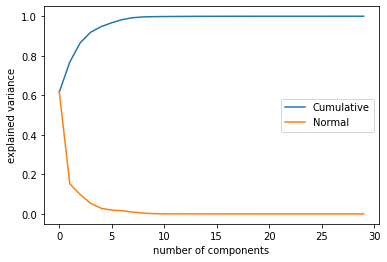

In [21]:
n_components=30

y = Y['Hinselmann']
pca = PCA(n_components=n_components, random_state=42)
pca_results = pca.fit_transform(X.values)

# Plot cumulative and proportional variance explained
plt.plot(np.cumsum(pca.explained_variance_ratio_), label="Cumulative")
plt.plot(pca.explained_variance_ratio_, label="Normal")
plt.legend()
plt.xlabel('number of components')
plt.ylabel('explained variance')

In [22]:
n_components=9
pca = PCA(n_components=n_components, random_state=42)
pca_results = pca.fit_transform(X.values)
print('>> Cumulative explained variance for {} principal components: {}'.format(
    n_components,
    np.sum(pca.explained_variance_ratio_))
)

>> Cumulative explained variance for 9 principal components: 0.9966405340853833


In [ ]:
# In this way I'm taking the first 467 on the train and the rest on test (which I don't like, but maybe there is a reason)
# train_len = 467
# train_pca, test_pca = np.split(pca_results, [train_len], axis=0)
# train_pca_y, test_pca_y = np.split(y.values, [train_len], axis=0)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
# So I prefer to use this to split train and test
train_pca, test_pca, train_pca_y, test_pca_y = train_test_split(pca_results, y, test_size=0.3, random_state=42) #TODO understand how to add stratify

After applying PCA, we apply SMOTE on the obtained dataset

In [25]:
from imblearn.over_sampling import SMOTE
oversampling = SMOTE(sampling_strategy='minority', random_state=42)

In [26]:
train_pca_smote, train_pca_smote_y = oversampling.fit_resample(train_pca, train_pca_y)

In [27]:
y_label = 'Hinselmann'
columns_names = [f"pc{i+1}" for i in range(n_components)] + [y_label]

train_pca_df = pd.DataFrame(
    np.c_[train_pca_smote, train_pca_smote_y],
    columns=columns_names)
test_pca_df = pd.DataFrame(
    np.c_[test_pca, test_pca_y],
    columns=columns_names)

train_pca_df[y_label] = train_pca_df[y_label].astype(int)
test_pca_df[y_label] = test_pca_df[y_label].astype(int)

train_pca_df.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,Hinselmann
0,10.934935,-2.435187,-3.563541,-2.361388,-1.747570,-0.860913,0.842583,-0.177998,-0.130178,0
1,-1.861014,-1.402219,2.678127,1.494547,0.074622,-0.258752,0.127340,-1.081443,-0.248821,0
2,-10.672644,0.248321,-0.530190,0.034820,-0.139891,0.554827,-0.396888,0.192537,1.314509,0
3,-2.143051,11.331544,7.036601,0.891039,-0.523916,5.472790,0.215044,1.010643,-0.269921,0
4,-6.596134,-0.634044,-1.510566,1.616166,0.251334,-0.965376,0.455048,0.402326,-0.238877,0


In [28]:
print(pca_results.shape)
print(pca.components_.shape)
reconstructed = np.matmul(pca_results, pca.components_)

print(reconstructed.shape)

(668, 9)
(9, 30)
(668, 30)


In [29]:
#Sample a patient from the test set (it will be useful to make an example in decision trees)
test_pca_df[-2:-1].head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,Hinselmann
199,-1.665162,-1.248782,-2.60714,1.662075,-0.147944,-0.061424,0.105346,0.804421,-0.189263,0


In [30]:
eighth_component = pca.components_[7]
eighth_component

array([ 1.16722073e-01, -4.55478180e-02, -2.01615716e-01, -9.67679200e-01,
        4.69026860e-03,  2.61225331e-02, -3.01878355e-02, -6.72407109e-02,
        6.36822477e-03, -9.87009708e-03, -1.05664300e-02, -1.21129708e-02,
       -1.55764301e-02, -1.74408887e-03,  9.86076132e-32, -1.43084351e-03,
       -1.92826170e-03, -1.11861191e-02,  3.45605325e-03,  4.96314588e-05,
       -1.86961443e-03, -0.00000000e+00, -4.57381560e-03,  4.63291372e-04,
        3.18733700e-03, -1.61608491e-02,  2.85104212e-03, -1.62491618e-03,
       -1.00148420e-03, -4.45315570e-03])

In [31]:
for i in range(0, 9):
  print(X.keys()[i])

Age
Number of sexual partners
First sexual intercourse
Num of pregnancies
Smokes
Smokes (years)
Smokes (packs/year)
Hormonal Contraceptives
Hormonal Contraceptives (years)


Save new datasets

In [32]:
train_pca_df_str = train_pca_df.to_csv()
test_pca_df_str = test_pca_df.to_csv()

In [33]:
train_data_file = drive.CreateFile({'id': '1ETI1dvpXAkQgs_OjIf9SqkmO4tBUDTI4', 'title':'train_pca_df.csv', 'mimeType':'text/csv', "parents": [{"kind": "drive#fileLink", "id": dataset_folder_id}]})
train_data_file.SetContentString(train_pca_df_str)
train_data_file.Upload()
train_target_file = drive.CreateFile({'id': '1e2kOpEr82IAYExww-tvcN1ElDfEVGrol', 'title':'test_pca_df.csv', 'mimeType':'text/csv', "parents": [{"kind": "drive#fileLink", "id": dataset_folder_id}]})
train_target_file.SetContentString(test_pca_df_str)
train_target_file.Upload()

In [34]:
train_target_file['id']

'1e2kOpEr82IAYExww-tvcN1ElDfEVGrol'